<a href="https://colab.research.google.com/github/mouleshgs/ml/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/sharmasapna/house-price-prediction/refs/heads/master/train.csv -O train.csv

--2025-07-14 13:09:49--  https://raw.githubusercontent.com/sharmasapna/house-price-prediction/refs/heads/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 449.88K  --.-KB/s    in 0.04s   

2025-07-14 13:09:49 (11.6 MB/s) - ‘train.csv’ saved [460676/460676]



In [2]:
!wget https://raw.githubusercontent.com/sharmasapna/house-price-prediction/refs/heads/master/test.csv -O test.csv

--2025-07-14 13:09:49--  https://raw.githubusercontent.com/sharmasapna/house-price-prediction/refs/heads/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451405 (441K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 440.83K  --.-KB/s    in 0.03s   

2025-07-14 13:09:49 (14.9 MB/s) - ‘test.csv’ saved [451405/451405]



In [3]:
!pip install catboost xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


In [4]:
import pandas as pd

df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(df.columns.shape)
print(test_df.columns.shape)

(81,)
(80,)


In [5]:
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

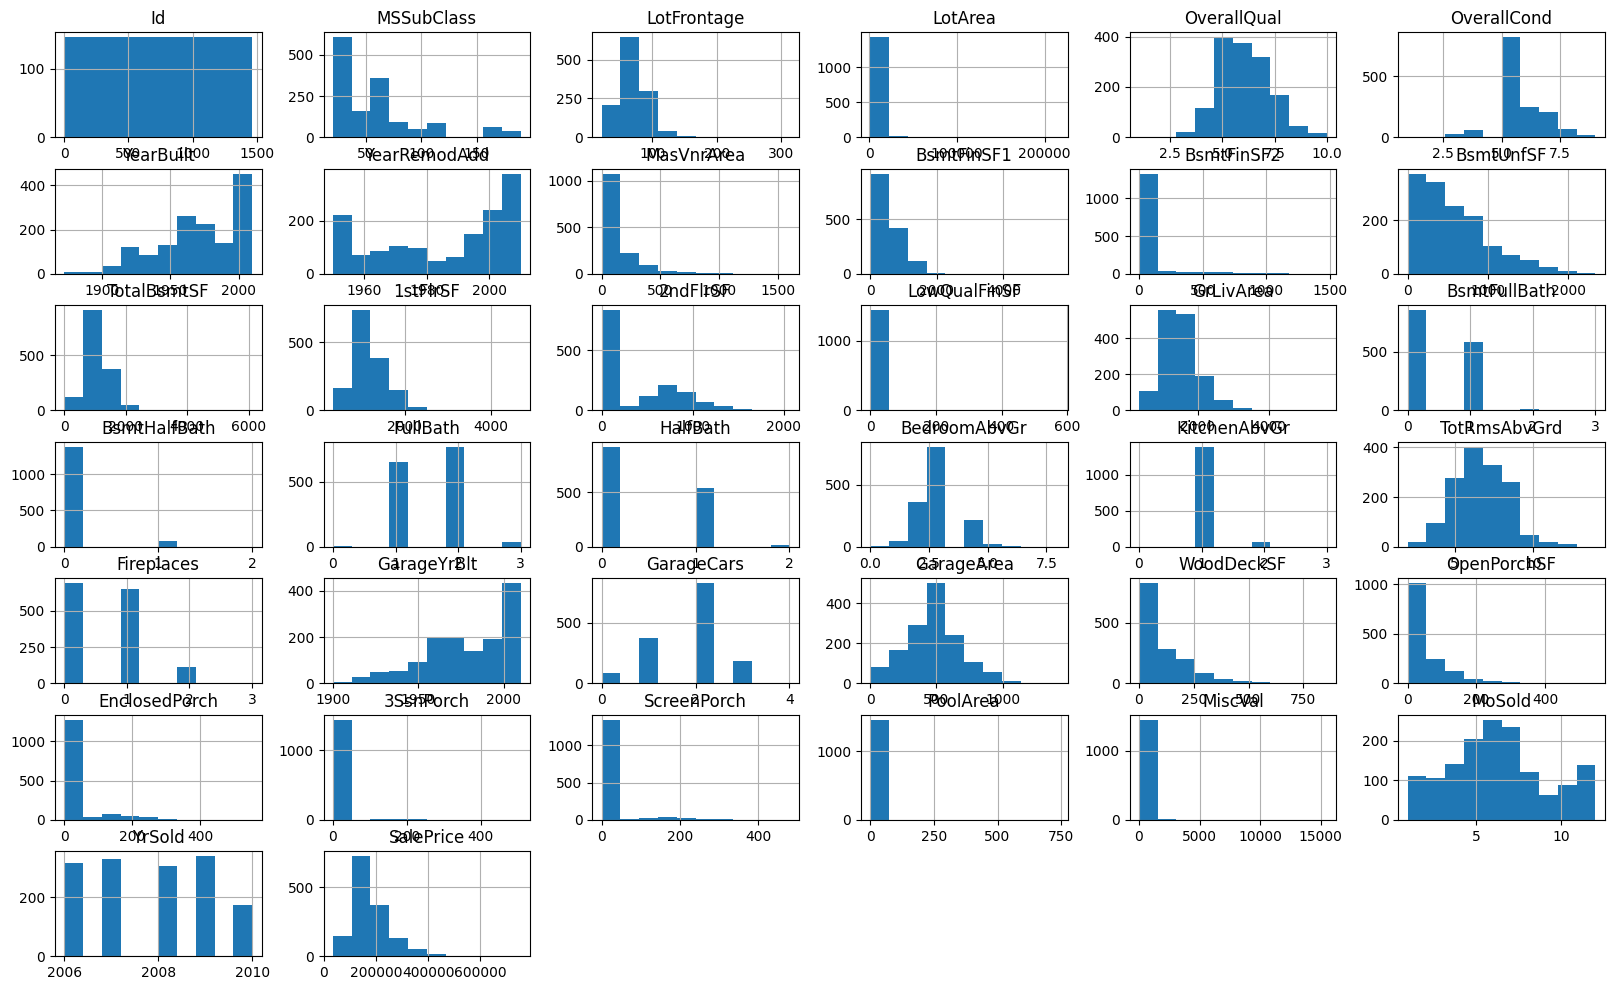

In [6]:
df.hist(figsize=(20, 12))

In [7]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import numpy as np

def evaluate_metrics(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(model_name)
    print(f"root mse : {rmse}")
    print(f"mae : {mae}")
    print(f"r2 : {r2}")


In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# CatBoost Model

In [10]:
from catboost import CatBoostRegressor

cat_features = [col for col in X_train.columns if X_train[col].dtype == 'object']


X_train[cat_features] = X_train[cat_features].fillna("missing").astype(str)
X_test[cat_features] = X_test[cat_features].fillna("missing").astype(str)

cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    verbose=0
)


cat_model.fit(X_train, y_train, cat_features=cat_features)

predicted = cat_model.predict(X_test)

evaluate_metrics("catboost", y_test, predicted)


catboost
root mse : 26896.214538707325
mae : 16296.415344131095
r2 : 0.9056876673857317


# Linear Regression model

In [11]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']

# numeric_cols = X_train.select_dtypes(include="number").columns
# X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
# X_test[numeric_cols] = X_test[numeric_cols].fillna(X_train[numeric_cols].median())
# model.fit(X_train, y_train)
# predicted = model.predict(X_test)




In [12]:
# evaluate_metrics("linear regression", y_test, predicted)

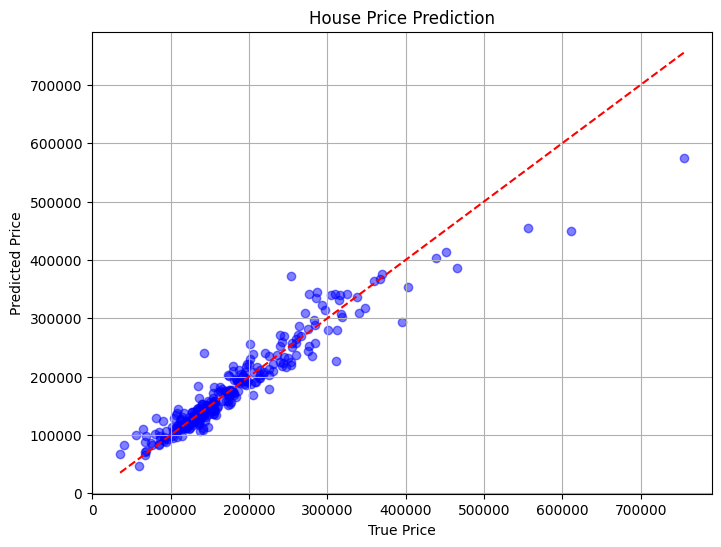

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, predicted, color='blue', alpha=0.5)
x1 = y_test.min()
y1 = y_test.max()
plt.plot([x1, y1],[x1, y1], 'r--')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('House Price Prediction')
plt.grid(True)
plt.show()


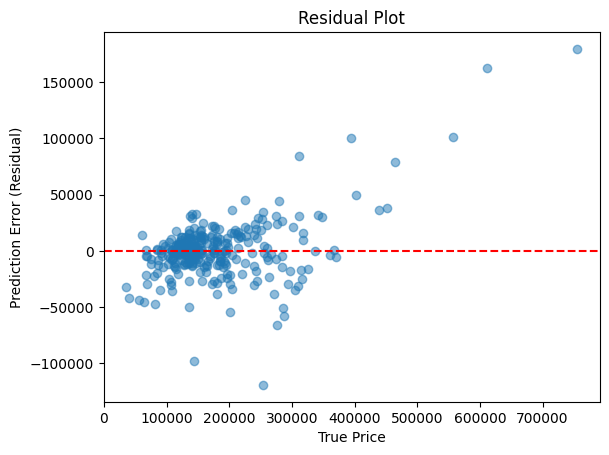

In [14]:
residuals = y_test - predicted
plt.scatter(y_test, residuals,alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("True Price")
plt.ylabel("Prediction Error (Residual)")
plt.title("Residual Plot")
plt.show()


In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# we can't use the confusion_matrix on regression model. it only suitable for classification type model